PyGSLIB
========

Introduction
---------------

This is a simple example on how to use raw pyslib to compute variograms




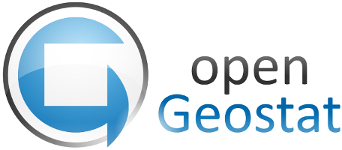

In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib                  

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= pygslib.gslib.read_gslib_file('../datasets/cluster.dat')  

In [4]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0.
mydata['bhid']=1.

# printing to verify results
print (' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5))

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619        0.0   
1        5.5        1.5     0.06       0.27                1.619        0.0   
2       38.5        5.5     0.08       0.40                1.416        0.0   
3       20.5        1.5     0.09       0.39                1.821        0.0   
4       27.5       14.5     0.09       0.24                1.349        0.0   

   bhid  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0  


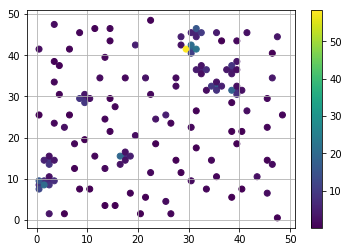

In [5]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## Testing variogram function gamv

This is the example in the book GSLIB User Guide (Problem set two: variograms). The variogram parameter file (modified) may look like this in GSLIB:

<pre><code>
                  Parameters for GAMV
                  *******************

START OF PARAMETERS:
cluster.dat                       -file with data
1   2   0  4                       -   columns for X, Y, Z coordinates, BHID
1   3                             -   number of variables,col numbers
-1.0e21     1.0e21                -   trimming limits
gamv.out                          -file for variogram output
10                                -number of lags
4.0                               -lag separation distance
2.0                               -lag tolerance
3                                 -number of directions
0.0  90.0 50.0   0.0  10.0  10.0  -azm,atol,bandh,dip,dtol,bandv
0.0  22.5 10.0   0.0  10.0  10.0  -azm,atol,bandh,dip,dtol,bandv
90.  22.5 10.0   0.0  10.0  10.0  -azm,atol,bandh,dip,dtol,bandv
0                                 -standardize sills? (0=no, 1=yes)
7                                 -number of variograms
1   1   1                         -tail var., head var., variogram type
1   1   3                         -tail var., head var., variogram type
1   1   4                         -tail var., head var., variogram type
1   1   5                         -tail var., head var., variogram type
1   1   6                         -tail var., head var., variogram type
1   1   7                         -tail var., head var., variogram type
1   1   8                         -tail var., head var., variogram type
5000                              - number of variogram cloud points


type 1 = traditional semivariogram
     2 = traditional cross semivariogram
     3 = covariance
     4 = correlogram
     5 = general relative semivariogram
     6 = pairwise relative semivariogram
     7 = semivariogram of logarithms
     8 = semimadogram

</code></pre>

 > Note: The indicator variograms are not implemented in the Fortran module. The user may define externally the indicator variables and run variogram (type 1) for indicator variography



In [6]:
# these are the parameters we need. Note that at difference of GSLIB this dictionary also stores 
# the actual data (ex, X, Y, etc.). 

#important! python is case sensitive 'bhid' is not equal to 'BHID'

parameters = { 
'x'      :  mydata['Xlocation']   , # X coordinates, array('f') with bounds (nd), nd is number of data points
'y'      :  mydata['Ylocation'],    # Y coordinates, array('f') with bounds (nd)
'z'      :  mydata['Zlocation'],    # Z coordinates, array('f') with bounds (nd)
'bhid'   :  mydata['bhid'],         # bhid for downhole variogram, array('i') with bounds (nd)    
'vr'     :  mydata['Primary'],      # Variables, array('f') with bounds (nd,nv), nv is number of variables
'tmin'   : -1.0e21,                 # trimming limits, float
'tmax'   :  1.0e21,                 # trimming limits, float
'nlag'   :  10,                     # number of lags, int
'xlag'   :  4,                      # lag separation distance, float                
'xltol'  :  2,                      # lag tolerance, float
'azm'    : [0,0,90],                # azimuth, array('f') with bounds (ndir)
'atol'   : [90,22.5,22.5],          # azimuth tolerance, array('f') with bounds (ndir)
'bandwh' : [50,10,10],              # bandwith h, array('f') with bounds (ndir)
'dip'    : [0,0,0],                 # dip, array('f') with bounds (ndir)
'dtol'   : [10,10,10],              # dip tolerance, array('f') with bounds (ndir)
'bandwd' : [10,10,10],              # bandwith d, array('f') with bounds (ndir)
'isill'  : 0,                       # standardize sills? (0=no, 1=yes), int
'sills'  : [100],                   # variance used to std the sills, array('f') with bounds (nv)
'ivtail' : [1,1,1,1,1,1,1],         # tail var., array('i') with bounds (nvarg), nvarg is number of variograms
'ivhead' : [1,1,1,1,1,1,1],         # head var., array('i') with bounds (nvarg)
'ivtype' : [1,3,4,5,6,7,8],         # variogram type, array('i') with bounds (nvarg)
'maxclp' : 50000}                   # maximum number of variogram point cloud to use, input int

'''
Remember this is GSLIB... use this code to define variograms
type 1 = traditional semivariogram
     2 = traditional cross semivariogram
     3 = covariance
     4 = correlogram
     5 = general relative semivariogram
     6 = pairwise relative semivariogram
     7 = semivariogram of logarithms
     8 = semimadogram

'''              

#check the variogram is ok
assert pygslib.gslib.check_gamv_par(parameters)==1 , 'sorry this parameter file is wrong' 


In [7]:
#Now we are ready to calculate the veriogram
pdis,pgam, phm,ptm,phv,ptv,pnump, cldi, cldj, cldg, cldh = pygslib.gslib.gamv(parameters)


The output is a set of 3d arrays (pdis,pgam, phm,ptm,phv,ptv,pnump) with dimensions (nvarg, ndir, nlag+2), representing the experimental variograms output, and 1D array (cldi, cldj, cldg, cldh) representing variogram cloud for first variogram/direction.

> This structure is complex but is like the standalone GSLIB gamv program. 

To plot the variograms we need to use pdis (pair distances) and  pgam (variogram values). Remember this arrays are 3D, to use the right values keep in mind that:

- dim 0 is the variogram number 
- dim 1 is the direction
- dim 2 is the lag

the number of variograms, directions and lags can be calculated as follows:

In [8]:
nvrg = pdis.shape[0]
ndir = pdis.shape[1]
nlag = pdis.shape[2]-2

Plotting results
-----------------------

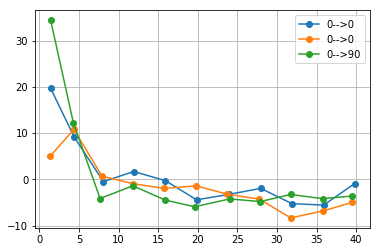

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

#plotting the variogram 1 only
v=1

# in all the directions calculated
for d in range(ndir):
    dip=parameters['dip'][d]
    azm=parameters['azm'][d]
    plt.plot (pdis[v, d, 1:], pgam[v, d, 1:], '-o', label=str(dip) + '-->' + str(azm))

# adding nice features to the plot
plt.legend()
plt.grid(True)
plt.show()


Plotting a variogram cloud
-----

The variogram cloud is not part of the standard GSLIB program. This was added to the actual fortran code along with downhole (or domain) variogram calculation. 

The variogram cloud is only calculated on direction one. To avoid memory issues a maximum number of variogram cloud points is accepted. This can be set with the parameter `maxclp` (in this case we are using maxclp=50000). 

In [10]:
#see if the maximum number of variogram cloud points was reached: 
n_cld= len(cldh)
print (n_cld, parameters['maxclp'] )

8877 50000


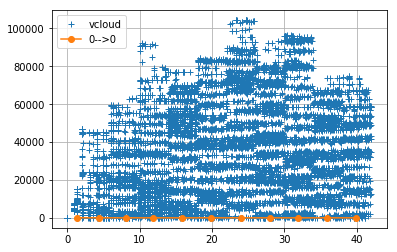

In [11]:
#plot variogram cloud (note that only was calculated for direction 1, variogram 1)

import numpy
plt.plot (cldh, cldg, '+', label='vcloud')
dip=parameters['dip'][0]
azm=parameters['azm'][0]

#plot the variogram on top for reference
plt.plot (pdis[0, 0, 1:], pgam[0, 0, 1:], '-o', label=str(dip) + '-->' + str(azm))
plt.legend()
plt.grid(True)

plt.show()


Plotting a set of different types of variograms
-----

In this example we reproduce the plots in the example in the book GSLIB User Guide (Problem set two: variograms, page 251). 

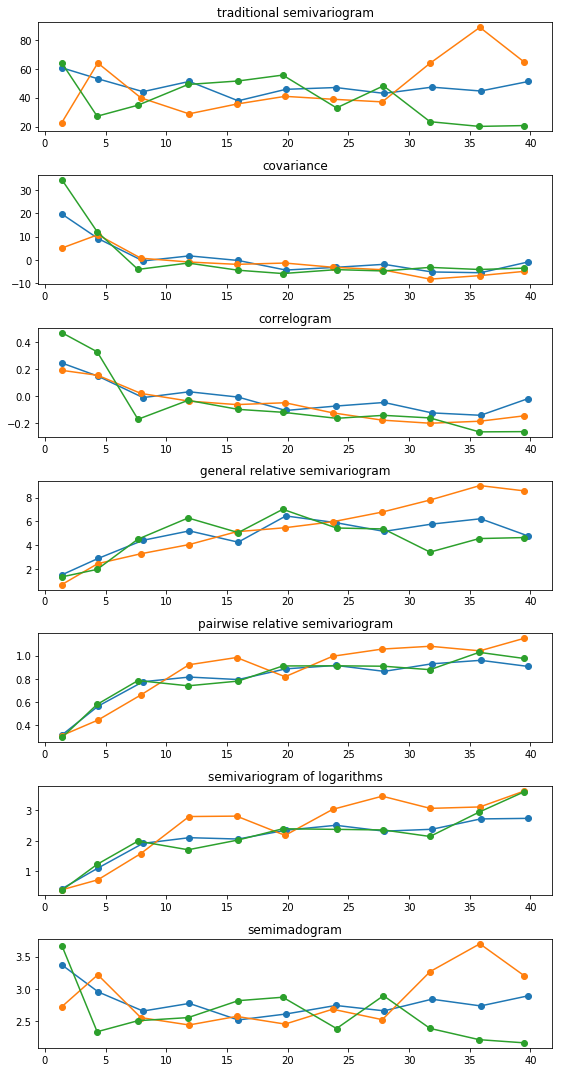

In [12]:
#plot all variograms in direction 1 (omnidirectional)

nvrg = len(parameters['ivtype']) 
tpe={1 : 'traditional semivariogram',
     2 : 'traditional cross semivariogram',
     3 : 'covariance',
     4 : 'correlogram',
     5 : 'general relative semivariogram',
     6 : 'pairwise relative semivariogram',
     7 : 'semivariogram of logarithms',
     8 : 'semimadogram',
     9 : 'indicator semivariogram - continuous',
     10 : 'indicator semivariogram - categorical'}

f, sp = plt.subplots(nrows=nvrg, figsize=(8,15))



for v in range(nvrg):
    t=tpe[parameters['ivtype'][v]]
    azm=parameters['azm'][d]
    sp[v].plot (pdis[v, 0, 1:], pgam[v, 0, 1:], '-o')
    sp[v].plot (pdis[v, 1, 1:], pgam[v, 1, 1:], '-o')
    sp[v].plot (pdis[v, 2, 1:], pgam[v, 2, 1:], '-o')
    sp[v].set_title(t)

plt.tight_layout()

plt.show()